Задание1: Обучить AE собственной архитектуры на MNIST

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3802 - val_loss: 0.1931
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1823 - val_loss: 0.1550
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1505 - val_loss: 0.1349
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1324 - val_loss: 0.1216
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1207 - val_loss: 0.1135
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1133 - val_loss: 0.1080
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1079 - val_loss: 0.1036
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1040 - val_loss: 0.0999
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1008 - val_loss: 0.0972
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0982 - val_loss: 0.0953
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0965 - val_loss: 0.0942
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

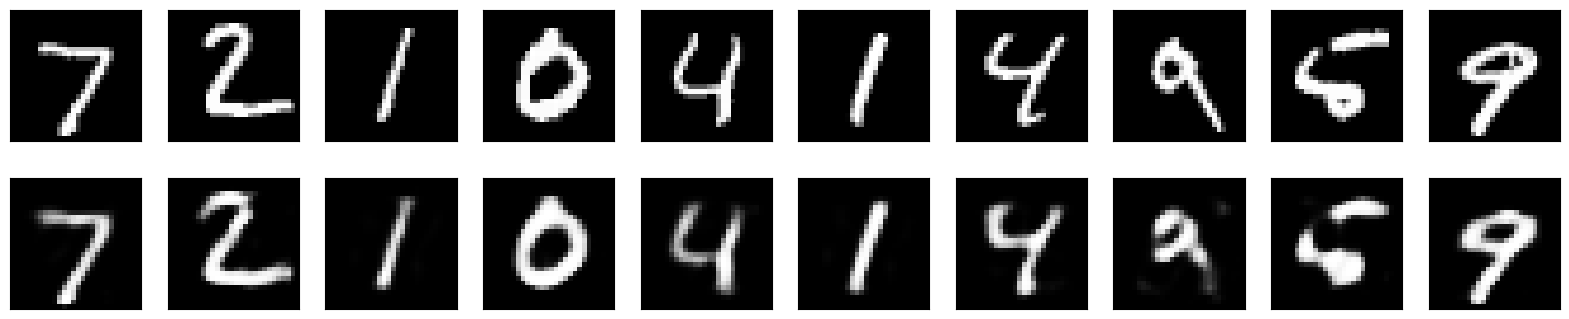

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Загружаем и подготавливаем данные MNIST
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Создаем модель автоэнкодера
input_img = Input(shape=(784,))
encoding_dim = 32  
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучаем автоэнкодер
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Демонстрация работы автоэнкодера
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Расчет среднеквадратичной ошибки
mse = mean_squared_error(x_test.flatten(), decoded_imgs.flatten())

# Для наглядности умножаем на 100. Не является процентом в прямом смысле
mse_percent_scale = mse * 100

# Вывод среднеквадратичной ошибки с 7 знаками после запятой и домноженная на 100
print(f"Среднеквадратичная ошибка : {mse_percent_scale:.7f}")

# Визуалиация оригинальных и восстановленных изображений
n = 10  # Количество изображений для демонстрации
plt.figure(figsize=(20, 4))
for i in range(n):
    # Отображаем оригинальные изображения
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Отображаем изображения после обработки автоэнкодером
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()